# DRFP - Reaction fingerprint

DRFP is a reaction fingerprint developed by Probst et al.. 

Here we will just perform a quick test that it is correctly installed to show you the different ways of installing it.

To display the path to the activated conda environment, we can run:

In [1]:
import sys 
print(sys.prefix)

/Users/victoire/miniconda3/envs/drfp_env


This should end with `drfp_source`, if you followed the tutorial in the README

We can also check where we installed the `drfp` package.

In [2]:
import drfp
print("DRFP installed in:", drfp.__file__)

DRFP installed in: /Users/victoire/miniconda3/envs/drfp_env/lib/python3.10/site-packages/drfp/__init__.py


Those two checks were mainly to show you how the python package installation is working.

Compare the `path` with what you had in the output in `partA`. As you installed it with `pip install -e .`, the "editable" flag (`-e`), the `__file__` path should point to a subfolder of where you downloaded `drfp`. 

Hence, all the changes you make to the code in that folder, will be immediately reflected in your installation. 

Now, we need to import the reaction encoder (`DrfpEncoder`)

### Testing DRFP

In [3]:
from drfp import DrfpEncoder

Let's define a few reaction SMILES. If you want to see what they look like, you could use [CDK depict](https://www.simolecule.com/cdkdepict/depict.html).

In [5]:
rxn_smiles = [
    "CO.O[C@@H]1CCNC1.[C-]#[N+]CC(=O)OC>>[C-]#[N+]CC(=O)N1CC[C@@H](O)C1",
    "CCOC(=O)C(CC)c1cccnc1.Cl.O>>CCC(C(=O)O)c1cccnc1",
]

In [6]:
fps = DrfpEncoder.encode(rxn_smiles)
fps

[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)]

### Visualize the bits

We could visualize the bits with `matplotlib`, so let's try to do that.

In [9]:
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

As you have created a new conda environment and not yet installed `matplotlib` this should results in a:

```
---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
Cell In[6], line 1
----> 1 import matplotlib.pyplot as plt
      2 import numpy as np
      4 # Sample arrays, replace these with your actual data

ModuleNotFoundError: No module named 'matplotlib'
```

Conveniently, we can access the command line through a Jupyter notebook with `!`, and install `matplotlib` in the activate conda environment. 

In [10]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 2.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 6.1 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.8 MB/s eta 0:00:00a 0:00:01m
Using cached kiwisolver-1.4.5-cp310-cp310-macosx_11_0_arm64.whl (66 kB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


Now, we are able to import `matplotlib`. The reason we do not have to do the same with `numpy` is that it is a dependency of `drfp`, and therefore, was automatically installed together with `drfp`.

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# To make the visualisation a bit more appealing, we will not use the 2048 dimensions but only 128.
fps_128 = DrfpEncoder.encode(rxn_smiles, n_folded_length=128)
fps_128

[array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=uint8),
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)]

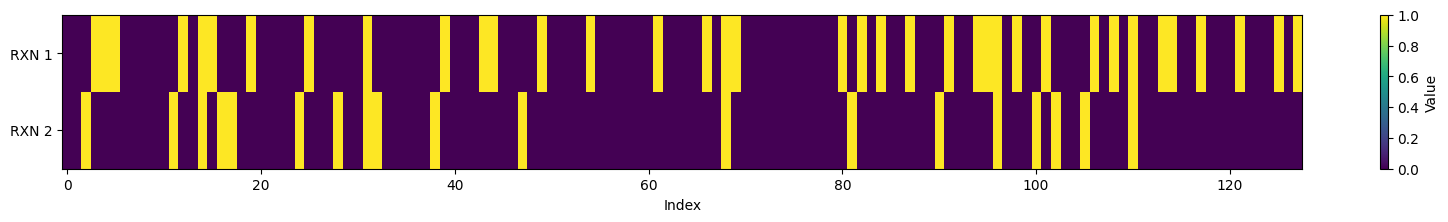

In [13]:
# Convert list of fingerprints into a 2D NumPy array
arrays_2d = np.array(fps_128)

# Visualize the arrays
plt.figure(figsize=(20, 2))  # Adjust the figsize as necessary
plt.imshow(arrays_2d, aspect='auto', cmap='viridis')
plt.colorbar(label='Value')
plt.yticks(ticks=np.arange(len(fps_128)), labels=[f'RXN {i+1}' for i in range(len(fps_128))])
plt.xlabel('Index')
plt.show()